<a href="https://colab.research.google.com/github/Pilla-Divya-Vidhyasree/Netflix-prime-movies-analysis/blob/main/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the required modules**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

**Analysis on Netflix Data**

### Displaying the dataframe

In [3]:
data=pd.read_csv("/content/netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


###The basic Information of data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


###Plotting piechart for the ratio of Movies and Tv Shows

<Axes: ylabel='type'>

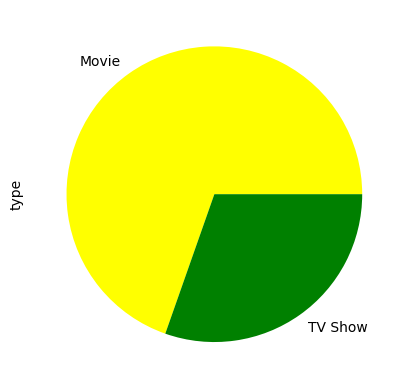

In [5]:
data['type'].value_counts().plot(kind='pie',colors=['yellow','green'])

We can see that movies are much more available in netflix compared to tv shows



###Extracting the count of movies released in corresponding year

###Extracting the count of Tv Shows released in corresponding year*

In [6]:
movies=data[data['type']=='Movie']
tv_shows = data[data['type']=='TV Show']
tv_year=tv_shows.groupby('release_year').agg({'type':'count'})
movie_year=movies.groupby('release_year').agg({'type':'count'})

**Data Cleaning**


###Merging count of movies and tv shows with their corresponding year

###Filling missing values with 0

In [7]:
#merging two dataframes
merged_df = pd.merge(tv_year, movie_year, on='release_year', suffixes=('Movies', 'TV Shows'), how='outer')

#setting release_year as col

merged_df.reset_index(inplace=True)
merged_df.rename(columns={'index':'release_year'}, inplace='True')
#filling missing values

mergerd_df=merged_df.fillna(0, inplace=True)
merged_df

,release_year,typeMovies,typeTV Shows
0,1925,1.0,0.0
1,1945,1.0,3.0
2,1946,1.0,1.0
3,1963,1.0,1.0
4,1967,1.0,4.0
...,...,...,...
69,1980,0.0,11.0
70,1982,0.0,17.0
71,1983,0.0,11.0
72,1984,0.0,12.0


###Plotting the bar graph that shows the ratio of movies ad Tv shows released in Each year

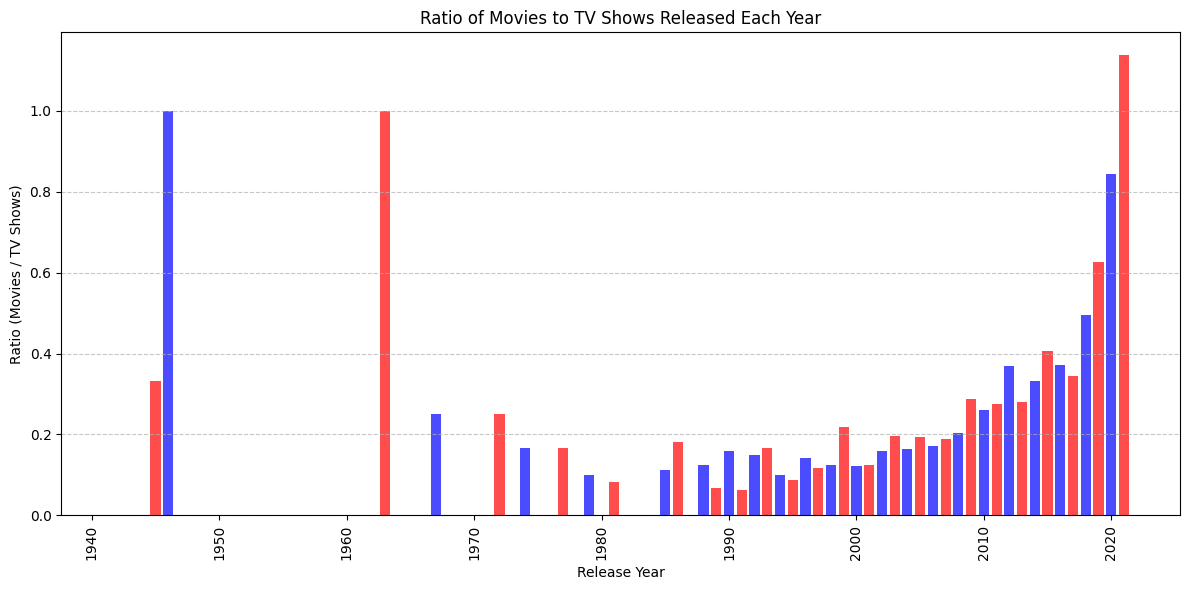

In [8]:
#calculating ratio btw movies and shows in years

merged_df['ratio']=merged_df['typeMovies']/merged_df['typeTV Shows']
merged_df

#creating bar graph

plt.figure(figsize=(12, 6))
plt.bar(merged_df['release_year'], merged_df['ratio'], color=['blue','red'], alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Ratio (Movies / TV Shows)')
plt.title('Ratio of Movies to TV Shows Released Each Year')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

We can see that In 2020 highest number of movies are recorded in netfix.



### Bar graph plots the Count of movies in corresponding coutries

<Axes: >

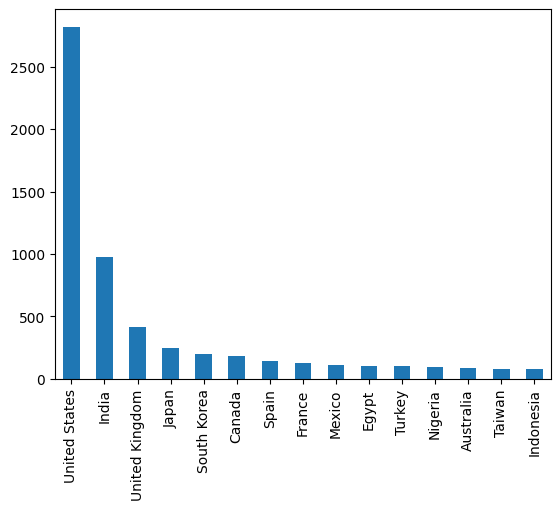

In [9]:
data.country.value_counts()[:15].plot(kind="bar")

We can observe that the more number of movies are released in United States

###Pie chart that depicts the rating in different jonours

<Axes: ylabel='rating'>

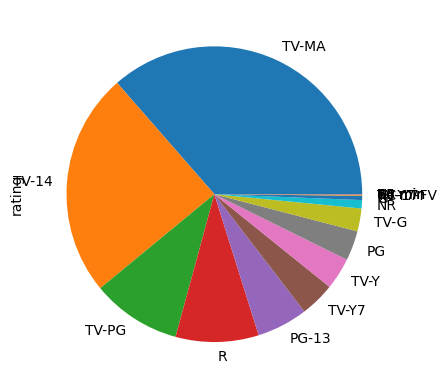

In [10]:
data.rating.value_counts().plot(kind='pie')

TV-MA and TV-14 contains the more rating compared to others

###The top 30 directors list who directed more number of movies

In [11]:
data['director'].value_counts().sort_values(ascending=False)[:30]

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Troy Miller                8
Hakan Algül                8
Robert Rodriguez           8
Fernando Ayllón            8
Shannon Hartman            8
Johnnie To                 8
Ryan Polito                8
Kunle Afolayan             8
Lance Bangs                8
Yılmaz Erdoğan             8
Quentin Tarantino          8
Mae Czarina Cruz           7
Ron Howard                 7
Toshiya Shinohara          7
McG                        7
Ram Gopal Varma            7
Prakash Satam              7
Hidenori Inoue             7
Name: director, dtype: int64

Rajiv Chilaka directed more number of movies i.e., he directed 19 movies overall

###Plotting the number of seasons available for Tv Shows

<Axes: >

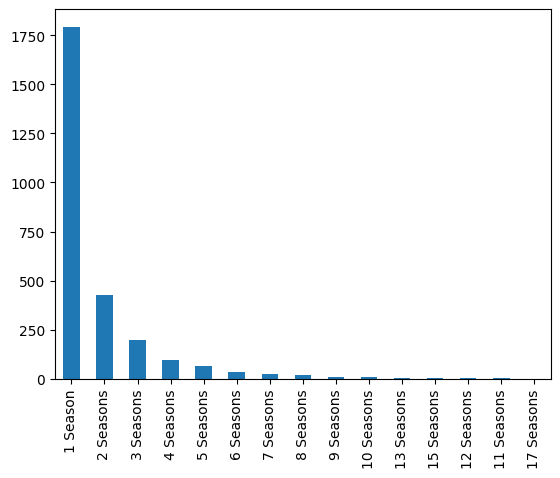

In [12]:
data[data['type']=='TV Show']['duration'].value_counts().plot(kind='bar')

 from this bar graph we know that Tv shows contain maximum 1 season only

In [13]:
data['listed_in'].value_counts()[:20]

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Independent M

### Printing count of different genres in ascending order by seperating every genre which are previously merged with comma

In [14]:
#printing differet generes count in an ascending order

stacked = data['listed_in'].str.split(', ').explode()
genere_count = stacked.value_counts().sort_index()
genere_count.columns=['genere_type','count']
genere_count

Action & Adventure               859
Anime Features                    71
Anime Series                     176
British TV Shows                 253
Children & Family Movies         641
Classic & Cult TV                 28
Classic Movies                   116
Comedies                        1674
Crime TV Shows                   470
Cult Movies                       71
Documentaries                    869
Docuseries                       395
Dramas                          2427
Faith & Spirituality              65
Horror Movies                    357
Independent Movies               756
International Movies            2752
International TV Shows          1351
Kids' TV                         451
Korean TV Shows                  151
LGBTQ Movies                     102
Movies                            57
Music & Musicals                 375
Reality TV                       255
Romantic Movies                  616
Romantic TV Shows                370
Sci-Fi & Fantasy                 243
S

Most directed movies are in the genre action and adventure

### Plotted the bar graph for count of genres

<Axes: >

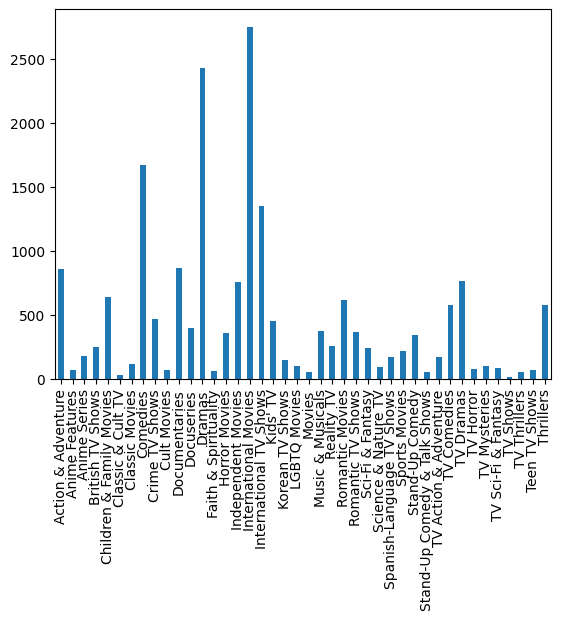

In [15]:
genere_count.plot(kind='bar', x='genere_type', y='count')

#**Analysis On Amazon prime dataset**

### Displaying the dataset

In [16]:
amazon_data=pd.read_csv("/content/Prime TV Shows Data set.csv", encoding='iso-8859-1')
amazon_data

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The basic information of dataset that was taken

In [17]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.no.                    404 non-null    int64  
 1   Name of the show         393 non-null    object 
 2   Year of release          393 non-null    float64
 3   No of seasons available  393 non-null    float64
 4   Language                 393 non-null    object 
 5   Genre                    393 non-null    object 
 6   IMDb rating              182 non-null    float64
 7   Age of viewers           393 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 25.4+ KB


### Counting the number of null values for every column

In [18]:
amazon_data.isnull().sum()

S.no.                        0
Name of the show            11
Year of release             11
No of seasons available     11
Language                    11
Genre                       11
IMDb rating                222
Age of viewers              11
dtype: int64

We can see that IMDb rating contains more missed values that means most number of people didnt give rating.

In [19]:
import missingno as msno
import seaborn as sns

### Matrix for missed values

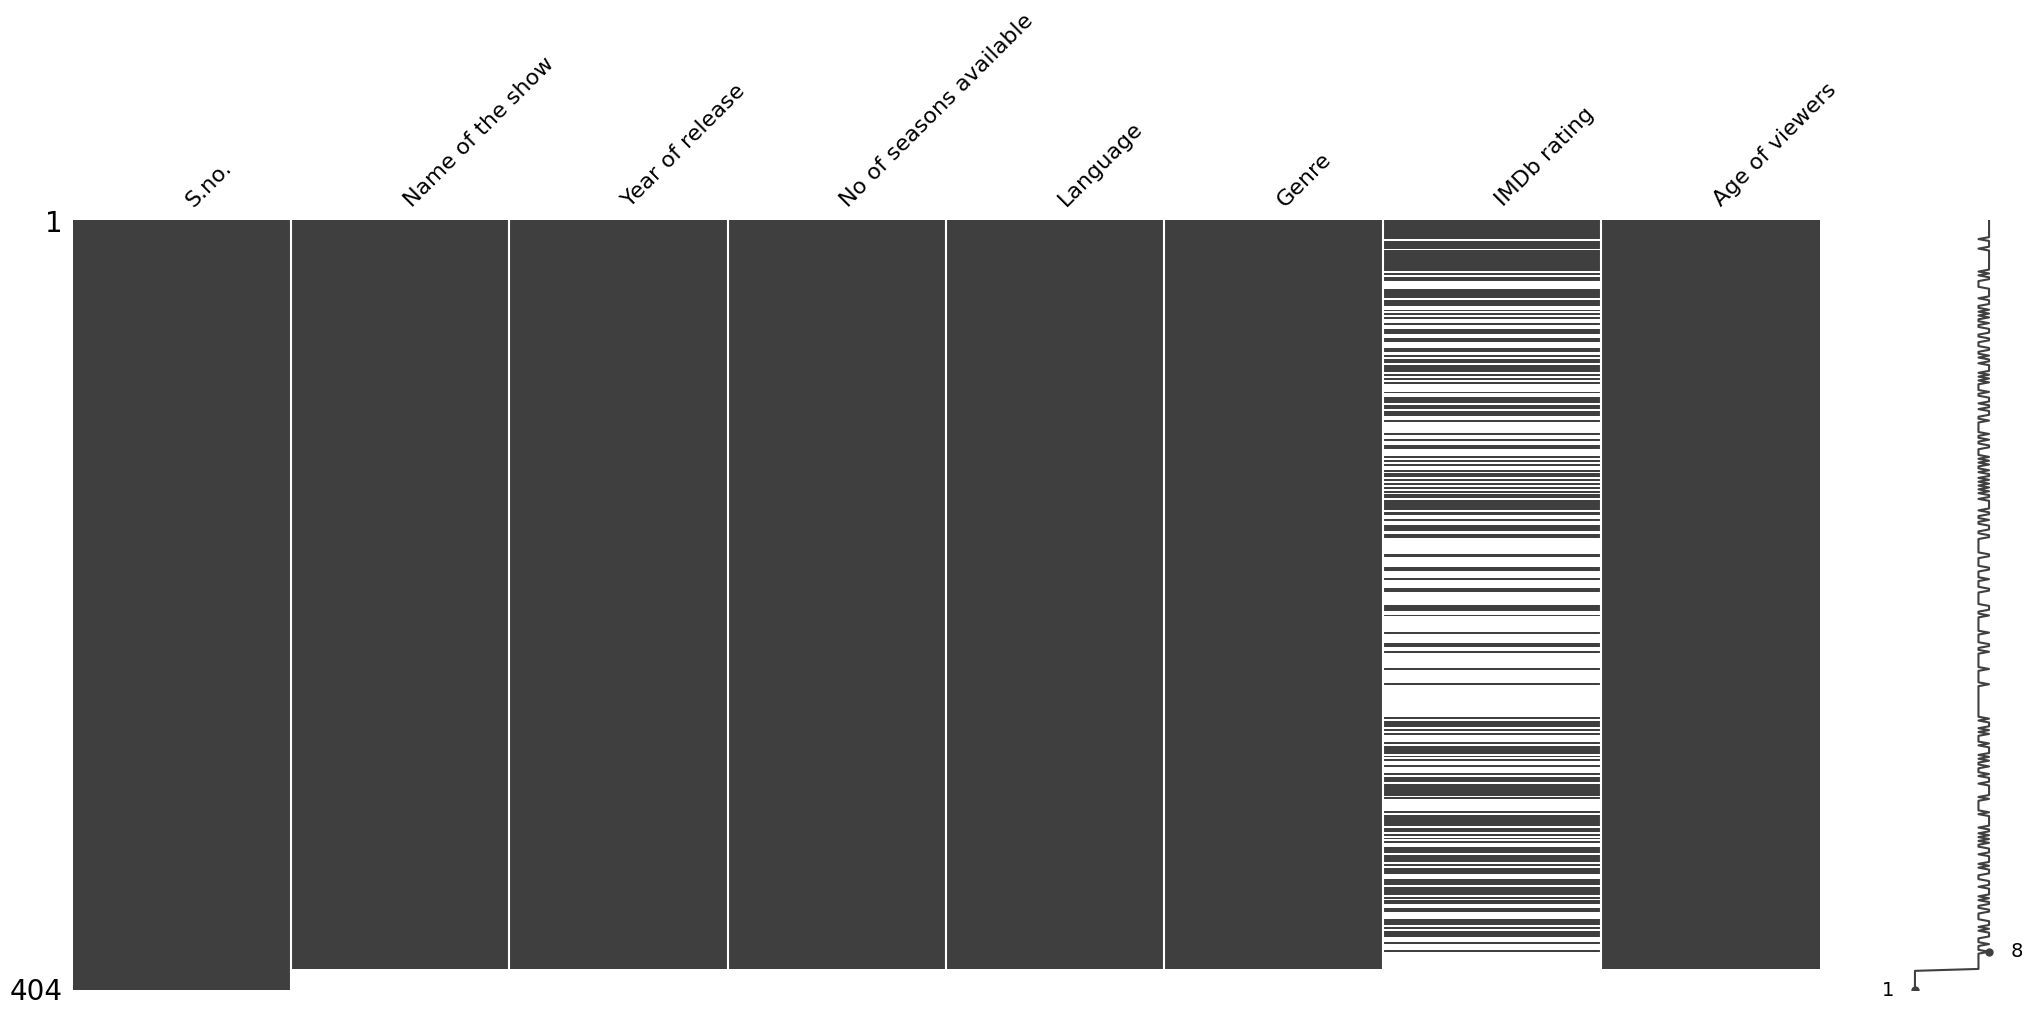

In [20]:
msno.matrix(amazon_data);

In [21]:
amazon_data.nunique()

S.no.                      404
Name of the show           391
Year of release             46
No of seasons available     15
Language                    14
Genre                       49
IMDb rating                 40
Age of viewers               5
dtype: int64

###Describing the mathematical information on datset

In [22]:
amazon_data.describe()

,S.no.,Year of release,No of seasons available,IMDb rating
count,404.000000,393.000000,393.000000,182.000000
mean,202.500000,2011.279898,2.608142,7.354396
std,116.769003,12.944861,2.592008,0.959372
min,1.000000,1926.000000,1.000000,3.700000
25%,101.750000,2011.000000,1.000000,6.900000
50%,202.500000,2016.000000,2.000000,7.500000
75%,303.250000,2018.000000,3.000000,8.100000
max,404.000000,2020.000000,20.000000,9.000000


### Top 5 Genres

In [23]:
amazon_data['Genre'].value_counts().head()

Drama            125
Comedy            97
Kids              29
Action            26
Drama, Comedy     15
Name: Genre, dtype: int64

We can see that mostly the dataset contains drama

### Filling the missing values with highest recorder values in every column

In [24]:
amazon_data['Genre'].fillna(amazon_data['Genre'].value_counts().index[0],inplace=True)
amazon_data['Name of the show'].fillna(amazon_data['Name of the show'].value_counts().index[0],inplace=True)
amazon_data['IMDb rating'].fillna(amazon_data['IMDb rating'].value_counts().index[0],inplace=True)
amazon_data['Year of release'].fillna(amazon_data['Year of release'].value_counts().index[0], inplace=True)
amazon_data

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,The Missing,2018.0,NaN,NaN,Drama,7.2,NaN
400,401,The Missing,2018.0,NaN,NaN,Drama,7.2,NaN
401,402,The Missing,2018.0,NaN,NaN,Drama,7.2,NaN
402,403,The Missing,2018.0,NaN,NaN,Drama,7.2,NaN


### Plotting the rating recorded in every year

In [25]:
sns.set_style('whitegrid')

In [26]:
amazon_data['Year of release']=amazon_data['Year of release'].astype(int)

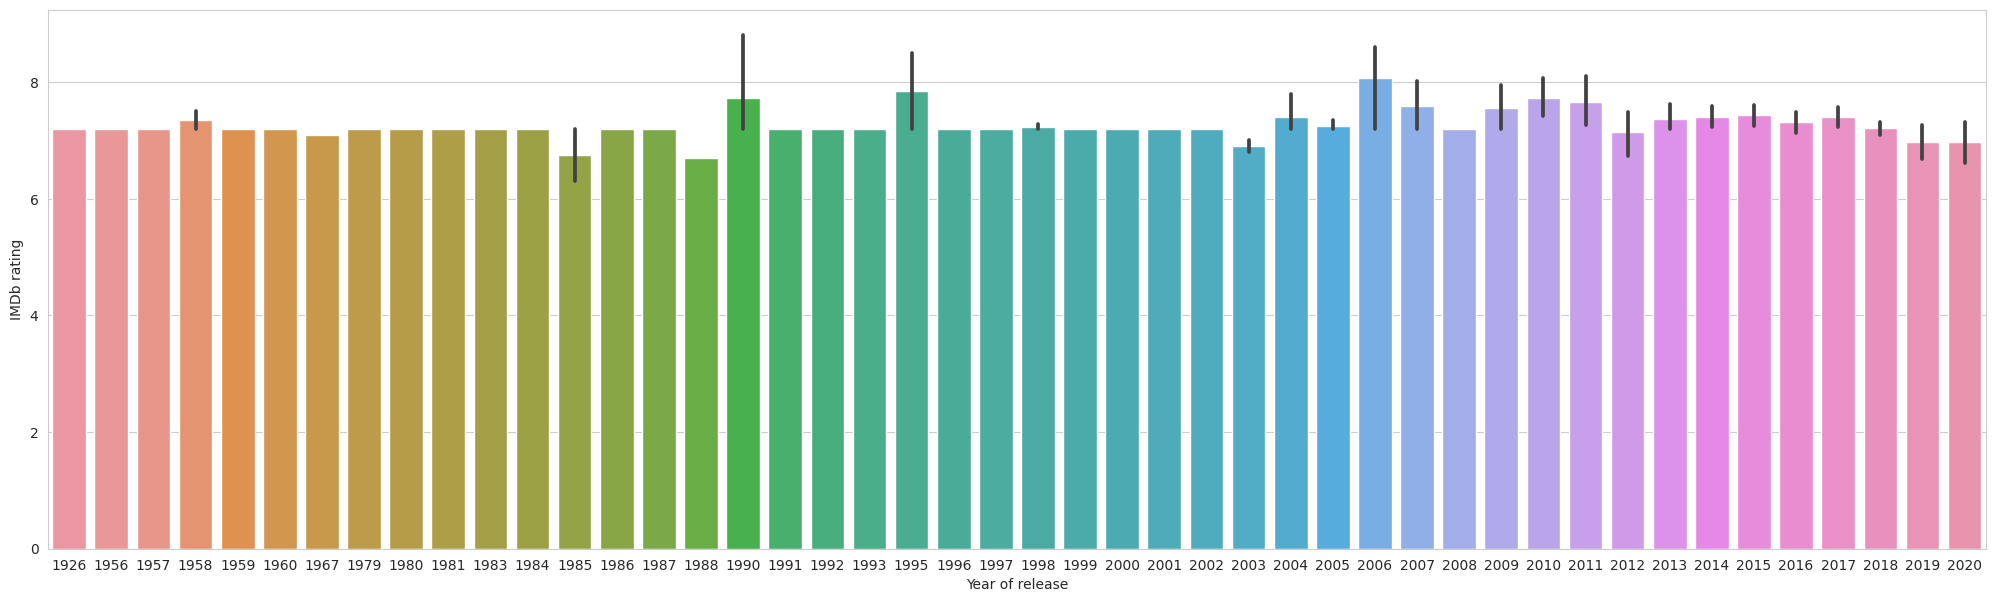

In [56]:
#plotting rating by release_year
plt.figure(figsize=(25,7))
sns.barplot(x = 'Year of release', y = 'IMDb rating', data = amazon_data.dropna(axis = 0, subset = ['Year of release']));

We can see that highest number of ratings are recorded in 2008

### Count of Number of seasons available in dataset

<Axes: xlabel='No of seasons available', ylabel='count'>

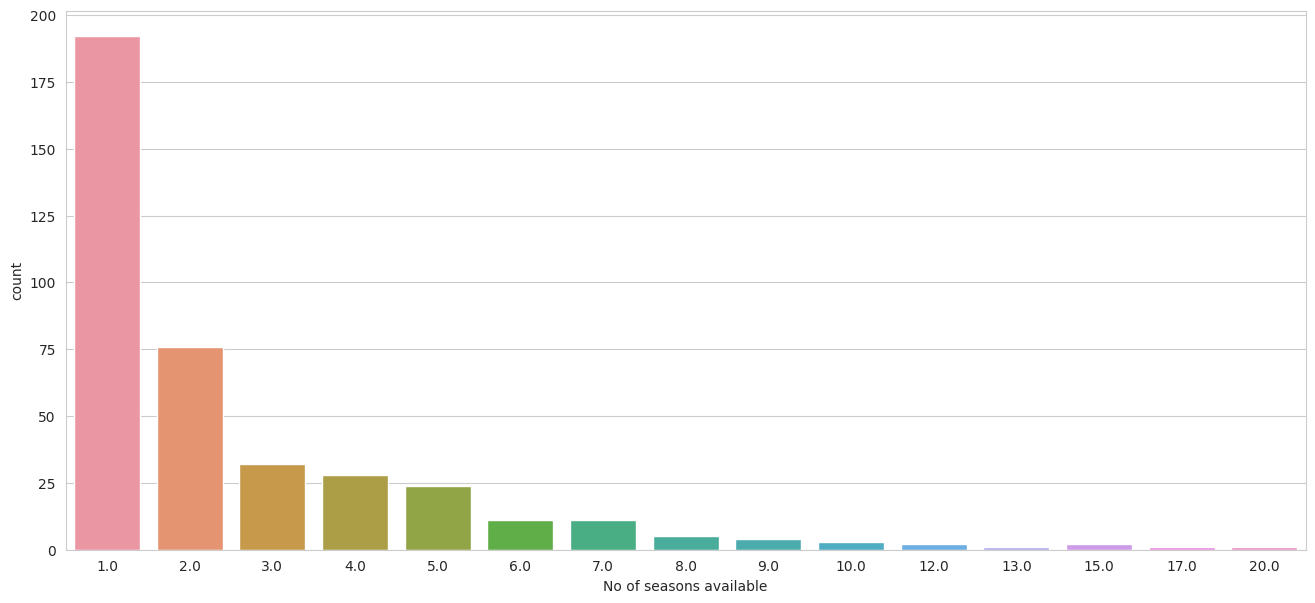

In [29]:
plt.figure(figsize=(16,7))
sns.countplot(x='No of seasons available', data=amazon_data)

We can observe that maximum movies contain  only 1 season.

### Plotting Number of seasons available in thier corresponding languages.

<Axes: xlabel='No of seasons available', ylabel='Language'>

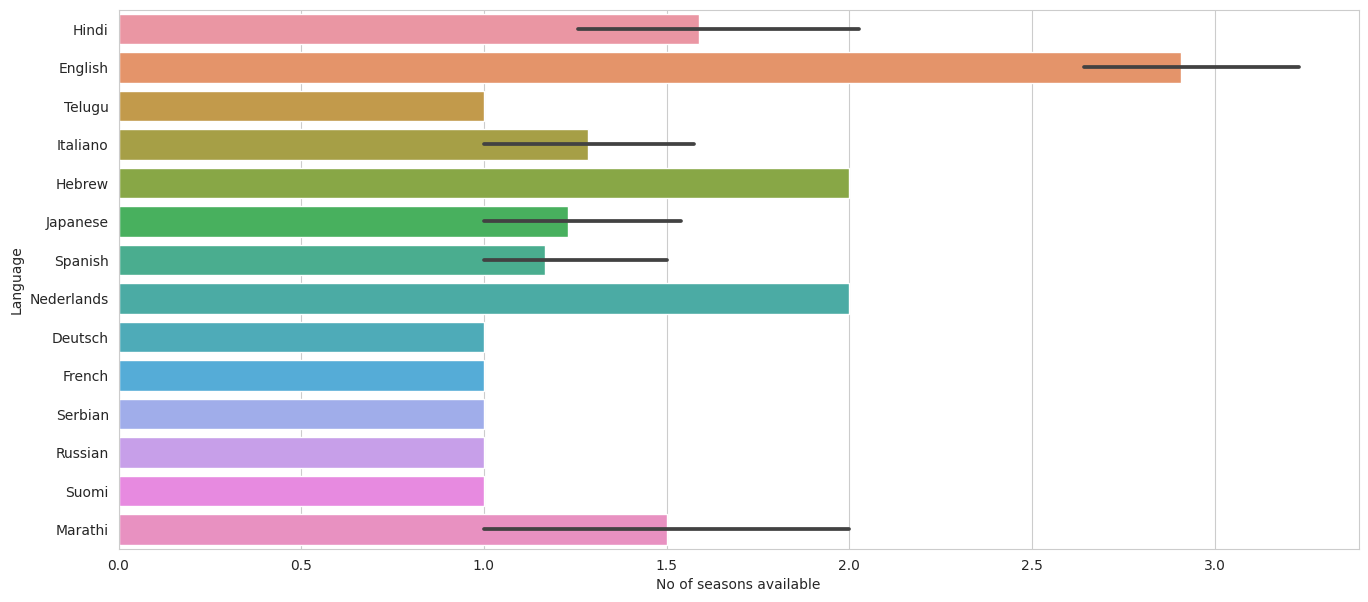

In [31]:
plt.figure(figsize=(16,7))
sns.barplot(x='No of seasons available', y='Language', data=amazon_data)

English language contains more number of seasons

### Plotting number of seasons available in every Genre

<Axes: xlabel='No of seasons available', ylabel='Genre'>

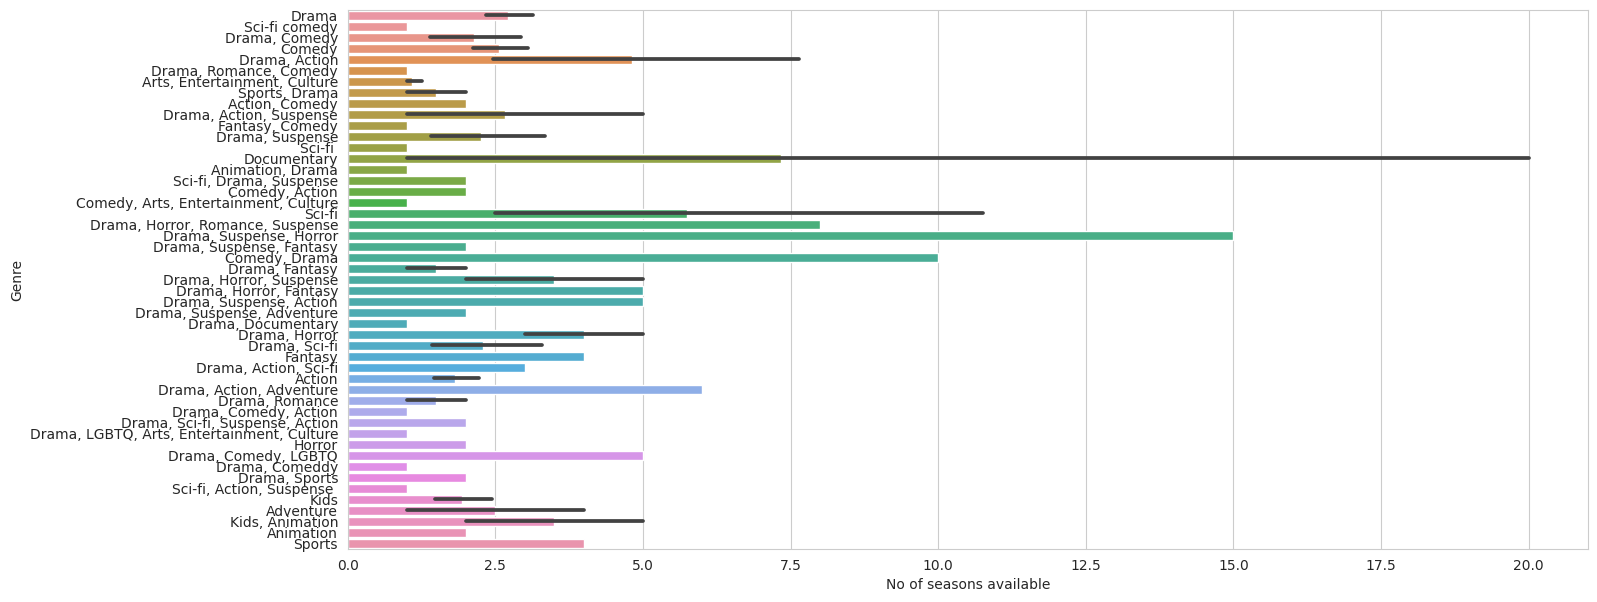

In [45]:
plt.figure(figsize=(16,7))
sns.barplot(y='Genre', x='No of seasons available',data=amazon_data)

### bar graph that contains the count of age of viewers

<Axes: xlabel='Age of viewers', ylabel='count'>

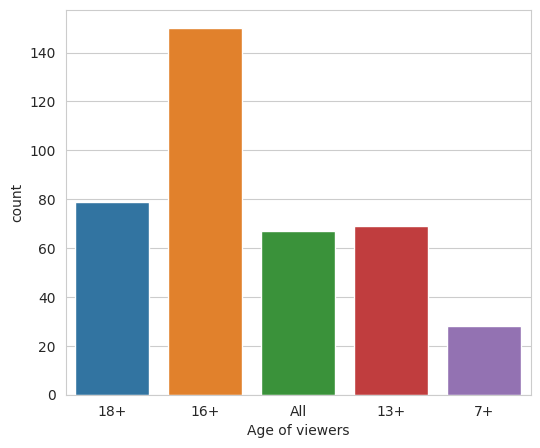

In [47]:
plt.figure(figsize=(6,5))
sns.countplot(x='Age of viewers', data=amazon_data)

From graph we can say that 16+ aged people are viewing movies more.

###top 20 that contains more IMDb rating and grouped by Genre

In [50]:
amazon_data.sort_values(by='IMDb rating',ascending=False).head(20).groupby(['Genre']).count()

,S.no.,Name of the show,Year of release,No of seasons available,Language,IMDb rating,Age of viewers
Genre,,,,,,,
"Action, Comedy",1,1,1,1,1,1,1
Comedy,3,3,3,3,3,3,3
"Comedy, Drama",1,1,1,1,1,1,1
Documentary,1,1,1,1,1,1,1
Drama,8,8,8,8,8,8,8
"Drama, Action",1,1,1,1,1,1,1
"Drama, Comedy",2,2,2,2,2,2,2
"Drama, Suspense",1,1,1,1,1,1,1
"Drama, Suspense, Horror",1,1,1,1,1,1,1


### The top 10 movies released in 2020 that rated highest

In [51]:
amazon_data[amazon_data['Year of release']==2020].sort_values(by='IMDb rating', ascending=False).head(10)

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,21,The Test: A New Era for Australia's Team,2020,1.0,English,Documentary,9.0,16+
1,2,Upload,2020,1.0,English,Sci-fi comedy,8.1,16+
17,18,The Forgotten Army- Azaadi ke Liye,2020,1.0,Hindi,"Drama, Action",8.0,18+
73,74,Star Trek: Picard,2020,1.0,English,Sci-fi,7.6,18+
0,1,Pataal Lok,2020,1.0,Hindi,Drama,7.5,18+
19,20,Tales from the Loop,2020,1.0,English,Sci-fi,7.5,18+
305,306,Dilruk Jayasinha: Bundle of Joy,2020,1.0,English,"Arts, Entertainment, Culture",7.2,16+
354,355,LOL: Australia,2020,1.0,English,Comedy,7.2,All
349,350,Tom Walker: Very Very,2020,1.0,English,Comedy,7.2,16+
339,340,Zoe Coombs Marr: Bossy Bottom,2020,1.0,English,Comedy,7.2,18+


###Movies that contains more than 5 seasons with highest rating

In [53]:
amazon_data[amazon_data['No of seasons available']>=5].sort_values(by='IMDb rating', ascending=False).head()

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
281,282,Seinfeld,1990,9.0,English,Comedy,8.8,13+
49,50,Downtown Abbey,2010,6.0,English,Drama,8.7,7+
47,48,Shameless,2011,10.0,English,"Comedy, Drama",8.6,18+
40,41,Dexter,2006,8.0,English,Drama,8.6,18+
105,106,Mad Men,2007,7.0,English,Drama,8.6,16+


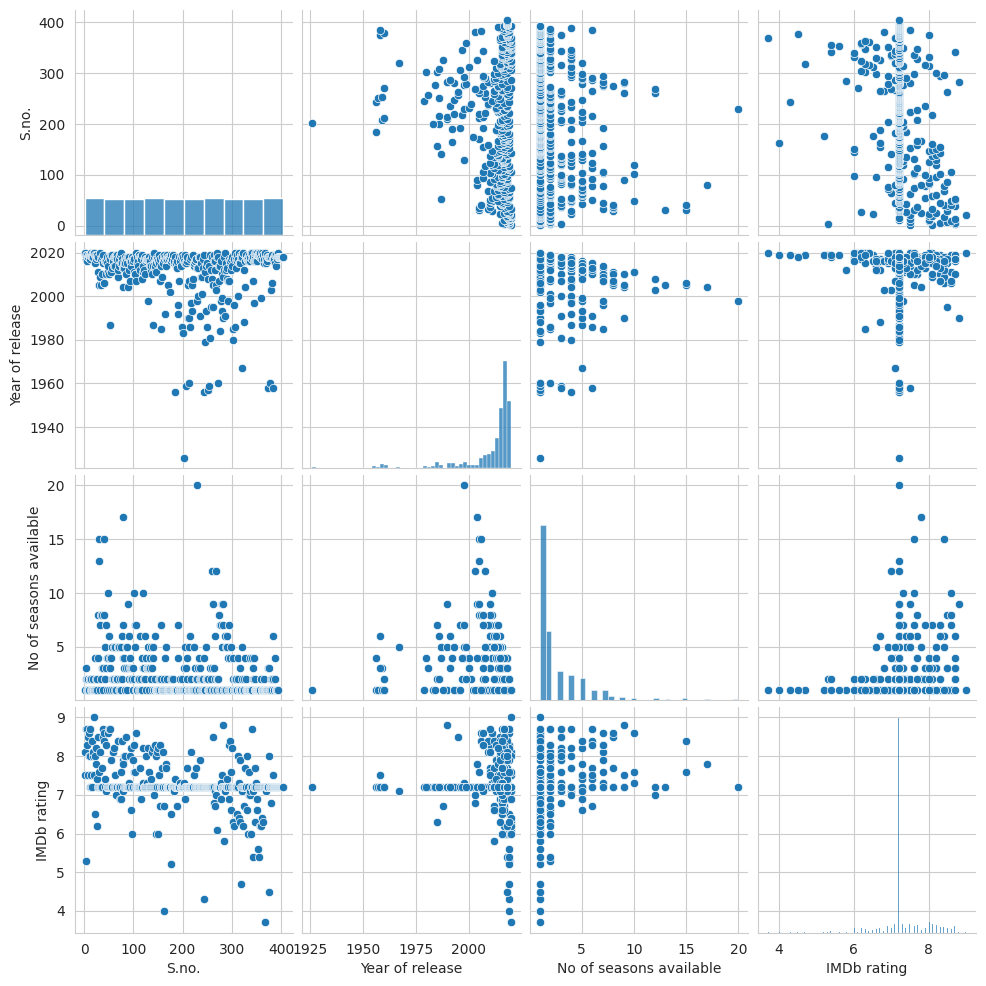

In [54]:
sns.pairplot(amazon_data)

###box plot for IMDb rating and Age of viewers.

<Axes: xlabel='IMDb rating', ylabel='Age of viewers'>

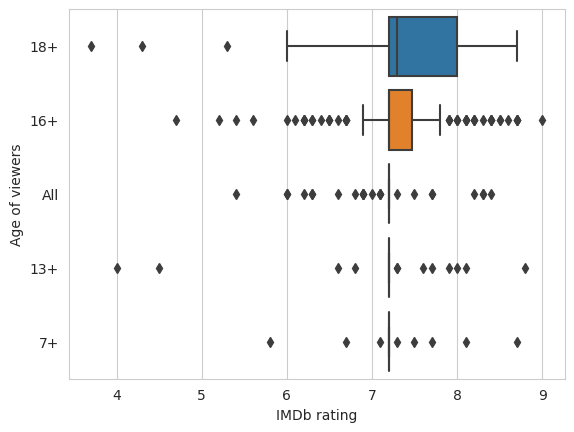

In [55]:
sns.boxplot(x='IMDb rating', y='Age of viewers', data=amazon_data)